<a href="https://colab.research.google.com/github/StickMonkey615/JHCSMod4/blob/main/Final%20Classifier%20Model%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [1]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')
# Import your dependencies
!pip install --upgrade xlrd > 1.2.0
!pip install imbalanced-learn
!pip install --upgrade imbalanced-learn
import xlrd
import imblearn
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 7.8 MB/s 
     |████████████████████████████████| 199 kB 42.6 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [2]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)
    return raw_df

In [3]:
local_file_path = "breast-cancer.xls"

In [4]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [5]:
# Look at the different dataframe column headings
print(raw_data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


In [6]:
# Determine data types for each column
for i in range(0, len(raw_data.columns)):
    print(type(raw_data.values[1][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
#Look at the range of values for each field
from collections import Counter
rng_vals=[]
for i in range(0,len(raw_data.columns)):
    rng_vals.append(Counter(raw_data.iloc[:,i].values))
    print(f"{raw_data.columns[i]}: {rng_vals[i]}")
del rng_vals, i

age: Counter({'50-59': 96, '40-49': 90, '60-69': 57, '30-39': 36, '70-79': 6, '20-29': 1})
menopause: Counter({'premeno': 150, 'ge40': 129, 'lt40': 7})
tumor-size: Counter({'30-34': 60, '25-29': 54, '20-24': 50, '15-19': 30, datetime.datetime(2014, 10, 1, 0, 0): 28, '40-44': 22, '35-39': 19, '0-4': 8, '50-54': 8, datetime.datetime(2019, 9, 5, 0, 0): 4, '45-49': 3})
inv-nodes: Counter({'0-2': 213, datetime.datetime(2019, 5, 3, 0, 0): 36, datetime.datetime(2019, 8, 6, 0, 0): 17, datetime.datetime(2019, 11, 9, 0, 0): 10, '15-17': 6, datetime.datetime(2014, 12, 1, 0, 0): 3, '24-26': 1})
node-caps: Counter({'no': 222, 'yes': 56, '?': 8})
deg-malig: Counter({2: 130, 3: 85, 1: 71})
breast: Counter({'left': 152, 'right': 134})
breast-quad: Counter({'left_low': 110, 'left_up': 97, 'right_up': 33, 'right_low': 24, 'central': 21, '?': 1})
irradiat: Counter({'no': 218, 'yes': 68})
Class: Counter({'no-recurrence-events': 201, 'recurrence-events': 85})


**All fields look to contain data that is catagorical in nature.**

**Some contain data that appears erroneous:**
 
*   **'tumor-size' and 'inv-nodes' appear to contain some data in a datetime format and some in string.**
*   **'node-caps' and 'breast-quad' contain Question Marks.**

**Need a way to address these erroneous data inputs.**



In [8]:
# Look in more detail at the columns with datetime data.
print(raw_data.iloc[:, 2].values)

['15-19' '15-19' '35-39' '35-39' '30-34' '25-29' '40-44'
 datetime.datetime(2014, 10, 1, 0, 0) '0-4' '40-44' '25-29' '15-19'
 '30-34' '25-29' '25-29' '20-24' datetime.datetime(2014, 10, 1, 0, 0)
 '15-19' '40-44' '20-24' '20-24' '40-44' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) datetime.datetime(2014, 10, 1, 0, 0)
 '30-34' '15-19' '30-34' '25-29' '25-29' '20-24' '30-34' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '45-49' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) '35-39' '35-39' '25-29' '20-24'
 '15-19' '30-34' datetime.datetime(2014, 10, 1, 0, 0) '35-39' '50-54'
 '40-44' '15-19' '30-34' '0-4' '40-44' '25-29' '25-29' '20-24' '35-39'
 '50-54' '0-4' '40-44' '30-34' '20-24' '30-34' '20-24' '15-19' '25-29'
 '15-19' '50-54' datetime.datetime(2014, 10, 1, 0, 0) '25-29' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '30-34' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '25-29' '25-29' '30-34'
 '15-19' '25-29' '30-34' '15-19'

In [9]:
# Look at output data
#print(raw_data.iloc[:, -1].values)
raw_data['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

Only 2 possible outputs, thus needs converting to binary format for use in classifier models.

In [10]:
# Check output balance
out = raw_data.iloc[:, -1].values
no_rows = len(raw_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
code_rows = le.fit_transform(out)
print("True outputs: {:.2f} %".format(sum(code_rows)/no_rows*100))
del out, no_rows, le, code_rows

True outputs: 29.72 %


Clear imbalance between output data. Some degree of bias/weighting/sampling will be required to ensure that results accurately predict outcomes for both True and False outcomes.

In [11]:
# Explain your key findings

**Data set is made up of 9 independent variables all of which appear catagorical in nature. Although stored as an integer, 'deg-malig' can be viewed as  catagorical data as it can only contain 3 discrete values.**

**The inclusion of datetime data entries in both the 'tumor-size' and 'inv-nodes' fields appears to be caused by a formatting entry within Excel. For example, '10-14' being input erroneously as 10/14 thus Excel has interpreted (and converted) it to the datetime field 01/10/2014. A function will need to be written within the model to convert these back to correct format.**

**How to deal with '?' entries in fields that are otherwise boolean poses an interesting dilemma. If these are infact meant to signify that the presence is unknown because no diagnostic work has been conducted, then this woiuld signify a valid data entry. If it is however just an incomplete data entry then there is a risk its inclusion could skew the model results. Without knowing which it seems wisest to remove this data from the dataset. Removal of the entire field could well deprive the model of important information, thus just removing these specific entries (rows) appears the most sensible option, particularly noting that there are relatively few occurences.**

**Data set is imbalanced, with dependent variable outputs only True in 30% of instances. The model applied will require this imbalance to be taken into account so as not to sacrifice results predicting this smaller class (surely the aim of cancer diagnosis) so as to achieve a high accuracy figure.**

**Output variable will need converting into binary output for use with a binary classification model.**

Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [12]:
class Module4_Model:
    
    def __init__(self):
        self.model = None

    def process_dataframe(self, unproc_data):
        """
        Function to remove any erroneous data and then process all data into a
        Pandas Dataframe with all data converted into catagorical date (i.e. 
        encoded) and dummy variables dropped.
        """
        # Deal with ? entries (remove them)
        indx = unproc_data[unproc_data.isin(['?'])].stack(dropna=True).unstack().index
        print(f"indx: {indx}")
        unproc_data = unproc_data.drop(index=indx)

        # Remove non-categorical data
        dm = unproc_data.pop('deg-malig')

        # Encode the catagorical data (dummy variables)
        proc_data = pd.get_dummies(data=unproc_data, prefix_sep='_', drop_first=True)
    
        # Add back in non-categorical data
        proc_data.insert(0, 'deg-malig', dm)
    
        return proc_data
    
    def reformat_dates(self, data):
        """ 
        Function to reformat datetime data entries in 'tumor-size' and 
        'inv-nodes' fields back into the string format expected.
        """
        # Correct date types in 'tumor-size' and 'inv-nodes' variables
        for i in range(0, len(data)):
            if type(data['tumor-size'][i]) is not str:
                if data['tumor-size'][i].day == 1:
                    data['tumor-size'][i] = str(data['tumor-size'][i].month) +'-' + str(data['tumor-size'][i].year-2000)
                else:
                    data['tumor-size'][i] = str(data['tumor-size'][i].day) + '-' + str(data['tumor-size'][i].month)
            if type(data['inv-nodes'][i]) is not str:
                if data['inv-nodes'][i].day == 1:
                    data['inv-nodes'][i] = str(data['inv-nodes'][i].month) + '-' + str(data['inv-nodes'][i].year-2000)
                else:
                    data['inv-nodes'][i] = str(data['inv-nodes'][i].day) + '-' + str(data['inv-nodes'][i].month)
        
        return data

    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features
        required in the class
        """
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(training_df)
        return processed_df

    def preprocess_test_data(self, test_df):
        """
        This function should process the test data and store any features
        required in the class
        """
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(test_df)
        return processed_df



In [13]:
# Dont change
my_model = Module4_Model()
# reformat date fields into string
raw_data_date = my_model.reformat_dates(raw_data)

# clean up data and create dataframe of only numerical (catagorical) data
clean_data = my_model.process_dataframe(raw_data_date)
del raw_data_date, raw_data

indx: Int64Index([20, 31, 50, 54, 71, 92, 149, 240, 264], dtype='int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to b

In [14]:
# Split your data so that you can test the effectiveness of your model
# Split the data into a Training set and a Test set
dfs = np.split(clean_data, [len(clean_data.columns)-1], axis=1)
X = dfs[0]
y = dfs[1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)
del dfs, X, y, clean_data

In [15]:
# Dont change
x_train_processed = my_model.preprocess_training_data(X_train)
del X_train

In [16]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently
# gain information that a model wouldnt have in reality and therefore get better predictions


In [17]:
# Dont change
x_test_processed = my_model.preprocess_test_data(X_test)
del X_test

In [18]:
# Apply dimensionality reduction
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 8, kernel = 'rbf')
x_train_processed = kpca.fit_transform(x_train_processed)
x_test_processed = kpca.transform(x_test_processed)

In [19]:
# Create models for evaluation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score,log_loss,recall_score,balanced_accuracy_score
from sklearn.metrics import precision_score,f1_score,confusion_matrix, fbeta_score
from imblearn.metrics import sensitivity_score, specificity_score, geometric_mean_score

models = ['ADA',
          'GBC',
          'EEC',
          'BRF',
          'RFC',
          'KNN',
          'SVC',
          'lReg']

classifiers = [AdaBoostClassifier(random_state=42),
               GradientBoostingClassifier(random_state=42),
               EasyEnsembleClassifier(base_estimator=RandomForestClassifier(random_state=42,
                                                                            n_estimators=60)),
               BalancedRandomForestClassifier(random_state=42),
               RandomForestClassifier(random_state=42, n_jobs=-1),
               KNeighborsClassifier(n_jobs=-1),
               SVC(random_state=42, probability=True),
               LogisticRegression(solver='newton-cg', multi_class='multinomial')]

# n_estimators range limited for EEC and KNN to reduce processing time. Initially
# ranges from 10 to 100 (incl.) were run before smaller ranges were selected.
params = {models[0]:{'learning_rate':[0.01,0.1,1,10],
                     'n_estimators':np.array(range(10,110,10)),
                     'algorithm':['SAMME','SAMME.R']},
          models[1]:{'learning_rate':[0.01,0.1,1,10],
                     'n_estimators':np.array(range(10,110,10)),
                     'max_depth':np.array(range(1,11,1))},
          models[2]:{'n_estimators':np.array(range(10,60,10)),
                     'base_estimator__n_estimators':np.array(range(40,100,10)),
                     'base_estimator__criterion':['gini','entropy'],
                     'base_estimator__class_weight':['balanced','balanced_subsample']},
          models[3]:{'n_estimators':np.array(range(10,110,10)),
                     'criterion':['gini','entropy'],
                     'class_weight':['balanced','balanced_subsample']},
          models[4]:{'n_estimators':np.array(range(10,110,10)),
                     'criterion':['gini','entropy'],
                     'class_weight':['balanced','balanced_subsample']},
          models[5]:{'n_neighbors':np.array(range(10,60,10)),
                     'weights':['uniform','distance'],
                     'algorithm':['auto','ball_tree'],
                     'metric':['chebyshev','minkowski']},
          models[6]:{'C':[1,10,60,100,600,1000],
                     'tol':[0.005],
                     'kernel':['linear','poly','rbf','sigmoid'],
                     'class_weight':['balanced']},
          models[7]:{'C':[1,10,60,100,600,1000],
                     'class_weight':['balanced'],
                     'solver':['newton-cg','lbfgs','sag','saga'],
                     'tol':[0.0001]}}

Define a scoring metric to determine which classifier is the most appropriate to use. As false negative results are those that, in a medical context, have the most significantly negative outcomes then this scoring metric will be used to assess minimisation against false negatives.

In [20]:
# Define custom scoring metric to be used to decide between different
# classifiers after grid search.
from sklearn.metrics import make_scorer
import math
def my_scorer(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    score = tn/(tn+fn) #measure between false negative and true negatives
    if math.isnan(score):
        score = 0.01
    return score

cust_score = make_scorer(my_scorer,greater_is_better=True)

In [24]:
# Conduct halving grid search across all models
y_tested=0
test_scores=[]
for name, estimator in zip(models,classifiers):
    print(name)
    clf = HalvingGridSearchCV(estimator=estimator,
                            param_grid=params[name],
                            factor=2,
                            scoring='balanced_accuracy',
                            cv=5,
                            n_jobs=-1,
                            verbose=0)
    clf.fit(x_train_processed, np.ravel(y_train.values))
    estimates = clf.predict_proba(x_test_processed)
    y_tested+=estimates
    acc = accuracy_score(y_test, clf.predict(x_test_processed))
    rec = recall_score(y_test, clf.predict(x_test_processed))
    pre = precision_score(y_test, clf.predict(x_test_processed))
    f1s = f1_score(y_test, clf.predict(x_test_processed), average='macro')
    cm = confusion_matrix(y_test, clf.predict(x_test_processed))
    sel_score = my_scorer(y_test, clf.predict(x_test_processed))    
    test_scores.append((name,acc,clf.best_score_,f1s,rec,pre,cm,clf.best_params_,sel_score))
    
submission = pd.DataFrame(test_scores, columns=['Classifier',
                                                'Accuracy',
                                                'Trg balanced accuracy score',
                                                'F-score test',
                                                'Recall',
                                                'Precision',
                                                'Confusion matrix',
                                                'Best params',
                                                'Selector'])
submission.to_csv(f"Results.csv")
del acc,clf,estimates,y_tested,rec,pre,f1s,cm,sel_score,test_scores,name,estimator

ADA
Best params: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10}
Best score: 0.538551038333647
Accuracy: 72.8571%
Recall: 26.3158%
Precision: 50.0000%
F-measure: 58.6828%
[[46  5]
 [14  5]]
GBC
Best params: {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 20}
Best score: 0.6164318652362131
Accuracy: 65.7143%
Recall: 26.3158%
Precision: 33.3333%
F-measure: 53.3851%
[[41 10]
 [14  5]]
EEC
Best params: {'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'entropy', 'base_estimator__n_estimators': 40, 'n_estimators': 10}
Best score: 0.5819894598155468
Accuracy: 57.1429%
Recall: 68.4211%
Precision: 35.1351%
F-measure: 55.3571%
[[27 24]
 [ 6 13]]
BRF


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/ensemble/_forest.py", line 566, in fit
    for i, (s, t) in enumerate(zip(samplers, trees))
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dis

Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 90}
Best score: 0.6200903444381705
Accuracy: 58.5714%
Recall: 84.2105%
Precision: 38.0952%
F-measure: 57.8751%
[[25 26]
 [ 3 16]]
RFC
Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 70}
Best score: 0.553471359558316
Accuracy: 65.7143%
Recall: 26.3158%
Precision: 33.3333%
F-measure: 53.3851%
[[41 10]
 [14  5]]
KNN


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.5        0.41666667        nan        nan        nan        nan
        nan        nan        nan        nan 0.51666667 0.56666667
        nan        nan        nan        nan        nan        nan
        nan        nan 0.5        0.41666667        nan        nan
        nan        nan        nan        nan        nan        nan
 0.51666667 0.56666667        nan        nan        nan        nan
        nan        nan        nan        nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the train scores are non-finite: [0.51702381 1.                nan        nan        nan        nan
        nan        nan        nan        nan 0.50702381 1.
        nan        nan        nan        nan        nan        nan
        nan        nan 0.51702381 1.                nan 

Best params: {'algorithm': 'auto', 'metric': 'chebyshev', 'n_neighbors': 50, 'weights': 'distance'}
Best score: 0.5241125541125541


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 72.8571%
Recall: 0.0000%
Precision: 0.0000%
F-measure: 42.1488%
[[51  0]
 [19  0]]
SVC
Best params: {'C': 1, 'class_weight': 'balanced', 'kernel': 'poly', 'tol': 0.005}
Best score: 0.6077214379823076
Accuracy: 42.8571%
Recall: 84.2105%
Precision: 30.1887%
F-measure: 42.8105%
[[14 37]
 [ 3 16]]
lReg
Best params: {'C': 600, 'class_weight': 'balanced', 'solver': 'saga', 'tol': 0.0001}
Best score: 0.6360336282075412
Accuracy: 68.5714%
Recall: 89.4737%
Precision: 45.9459%
F-measure: 67.2619%
[[31 20]
 [ 2 17]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ADA


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.208      0.208      0.208      0.208      0.208      0.208
 0.208      0.208      0.208      0.208             nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.81666667 0.81666667 0.81666667 0.81666667 0.88333333
 0.88333333 0.88333333 0.88333333 0.88333333 0.88333333 0.88333333
 0.81666667 0.83333333 0.86666667 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.78333333 0.78333333
 0.78333333 0.78333333 0.78333333 0.78333333 0.78333333 0.7833

Best params: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 10}
Best score: 0.7290872434017596
Accuracy: 72.8571%
Recall: 0.0000%
Precision: 0.0000%
F-measure: 42.1488%
[[51  0]
 [19  0]]
GBC


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan 0.71666667 0.71666667 0.71666667 0.71666667 0.71666667
 0.71666667 0.71666667 0.71666667 0.71666667        nan 0.71666667
 0.71666667 0.71666667 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333        nan 0.71666667 0.71666667 0.76666667
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
        nan 0.71666667 0.71666667 0.76666667 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333        nan 0.71666667
 0.71666667 0.76666667 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333        nan 0.71666667 0.71666667 0.76666667
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
        nan 0.71666667 0.71666667 0.76666667 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333        nan 0.71666667
 0.71666667 0.76666667 0.83333333 0.83333333 0.83333333 0

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}
Best score: 0.7168603634690591
Accuracy: 71.4286%
Recall: 15.7895%
Precision: 42.8571%
F-measure: 52.7665%
[[47  4]
 [16  3]]
EEC


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602   nan 0.702
 0.602 0.602 0.602   nan 0.602 0.602 0.602 0.602   nan 0.602 0.602 0.602
 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602
 0.602 0.602 0.602 0.602 0.602 0.602   nan 0.602 0.602 0.602 0.604 0.602
 0.602 0.602   nan 0.602 0.602 0.602 0.602 0.602 0.602 0.702 0.602 0.602
 0.604 0.602 0.602 0.602 0.602   nan 0.602 0.604 0.602 0.602 0.604 0.602
 0.604 0.602 0.602 0.602 0.602 0.702 0.602 0.602 0.602 0.602 0.702 0.602
 0.602 0.602 0.602 0.602 0.602 0.602   nan 0.602   nan 0.602 0.602 0.602
 0.602 0.602 0.602 0.602 0.702 0.602 0.602 0.602 0.602 0.702 0.602 0.602
 0.602 0.602 0.602   nan 0.602 0.602 0.602 0.602 0.602 0.602 0.602 0.602]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of

Best params: {'base_estimator__class_weight': 'balanced', 'base_estimator__criterion': 'entropy', 'base_estimator__n_estimators': 50, 'n_estimators': 10}
Best score: 0.7628602048106692
Accuracy: 58.5714%
Recall: 84.2105%
Precision: 38.0952%
F-measure: 57.8751%
[[25 26]
 [ 3 16]]
BRF
Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 80}
Best score: 0.8119281045751634
Accuracy: 60.0000%
Recall: 84.2105%
Precision: 39.0244%
F-measure: 59.1667%
[[26 25]
 [ 3 16]]
RFC


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.59452381 0.60833333
 0.61833333 0.64452381 0.65119048 0.62380952 0.62785714 0.6276190

Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 90}
Best score: 0.7428043068043069
Accuracy: 68.5714%
Recall: 31.5789%
Precision: 40.0000%
F-measure: 57.2697%
[[42  9]
 [13  6]]
KNN


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the train scores are non-finite: [0.7297619 1.              nan       nan       nan       nan       nan
       nan       nan       nan 0.725     1.              nan       nan
       nan       nan       nan       nan       nan       nan 0.7297619
 1.              nan       nan       nan       nan       nan       nan
       nan       nan 0.725     1.              nan       nan       nan
       nan       nan       nan       nan       nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or mor

Best params: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
Best score: 0.7158541462657146
Accuracy: 72.8571%
Recall: 15.7895%
Precision: 50.0000%
F-measure: 53.7391%
[[48  3]
 [16  3]]
SVC
Best params: {'C': 1, 'class_weight': 'balanced', 'kernel': 'sigmoid', 'tol': 0.005}
Best score: 0.7966666666666666
Accuracy: 68.5714%
Recall: 84.2105%
Precision: 45.7143%
F-measure: 66.8389%
[[32 19]
 [ 3 16]]
lReg


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1558, in fit
    % classes_[0]
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7

Best params: {'C': 1000, 'class_weight': 'balanced', 'solver': 'saga', 'tol': 0.0001}
Best score: 0.7892002734107998
Accuracy: 68.5714%
Recall: 89.4737%
Precision: 45.9459%
F-measure: 67.2619%
[[31 20]
 [ 2 17]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.74619048 0.71333333 0.71333333 0.69333333 0.73       0.69333333
 0.69333333 0.72       0.72       0.72       0.8        0.76333333
 0.66759019 0.63425685 0.64489011 0.72658009 0.67338384 0.69393939
 0.78920027 0.78862471 0.74052931]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Select the highest performing classifier
indx = submission['Selector'].idxmax()
my_model.classifier = classifiers[indx].set_params(**submission['Best params'][indx])

# Train your model
my_model.classifier.fit(x_train_processed, np.ravel(y_train.values))
del submission,indx

LogisticRegression(C=1000, class_weight='balanced', multi_class='multinomial',
                   solver='saga')

In [26]:
# use your model to make a prediction on unseen data
y_pred = my_model.classifier.predict(x_test_processed)

Accuracy: 68.57 %
Weighted ROC AUC accuracy: 75.13 %
Confusion matrix:


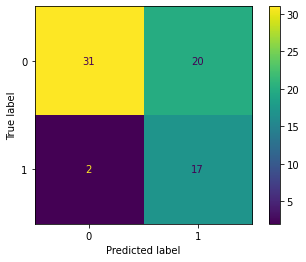

False negatives: 2.86 %
F-score (macro): 67.26 %
K-fold cross validation results
Accuracy: 65.44 %
Standard Deviation: 10.86 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [28]:
# Asssess the accuracy of your model and explain your key findings
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=my_model.classifier.classes_)
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
print("Weighted ROC AUC accuracy: {:.2f} %".format(roc_auc_score(y_test, y_pred, average='weighted')*100))
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(cm, display_labels=my_model.classifier.classes_)
disp.plot()
plt.show()
print("False negatives: {:.2f} %".format(cm[1,0]/sum(sum(cm))*100))
print("F-score (macro): {:.2f} %".format(f1_score(y_test,y_pred,average='macro')*100))

# Apply k-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=my_model.classifier,
                             X=x_train_processed,
                             y=np.ravel(y_train.values),
                             scoring='roc_auc_ovo',
                             cv=10)
print("K-fold cross validation results")
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
del cm, accuracies, disp

**Model has an accuracy of around 65% (non-deterministic nature means this is slightly variable) when predicting whether cancer recurrence will occur.**

**Crucially, the proportion of False Negatives is very low (<5%). In cancer diagnosis these are the outcomes that we want to minimise. False Positives, whilst undesirable, will likely lead to further diagnostic testing before it is realised that cancer is not present.**

### Unit tests:

# New section

###Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [29]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [30]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)